# Language Classification with Naive Bayes in Python

## Recommended Prerequisites for Successful Completion
* Intermediate level understanding of Python 3+ (e.g. list and dictionary comprehension)
* Basics of machine learning (e.g. the distinction between training and validation data)
* Mathematical probability (e.g. understanding Bayes' Theorem at a basic level)


## Project Outline
[**Introduction**](#intro)

[**Task 1**](#task1): Exploratory Data Analysis + Visualization

[**Task 2**](#task2): Data Cleaning and Preprocessing

[**Task 3**](#task3): Naive Bayes Model Introduction and Training

[**Task 4**](#task4): Highlighting Problems with Basic Model and Simple Fixes

[**Task 5**](#task5): Advanced Approach to Further Improve Performance

In [12]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import string

from collections import defaultdict

from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

import joblib
import pickle as pkl

from helper_code import *

<a id='intro'></a>
# Introduction

In [13]:
model = joblib.load('Data/Models/final_model.joblib')
vectorizer = joblib.load('Data/Vectorizers/final_model.joblib')

c:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.22.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.22.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## [Slovak Wikipedia Entry](https://sk.wikipedia.org/wiki/Jazveč%C3%ADk)
Mnohí ľudia, ktorí vidia na ulici jazvečíka s podlhovastým telom vôbec nevedia o tom, že tento malý štvornohý a veľmi obľúbený spoločník je pri dobrom výcviku obratným, vynikajúcim a spoľahlivým poľovným psom. Ako poľovný pes je mnohostranne využiteľný, okrem iného ako durič na brlohárenie. Králičí jazvečík sa dokáže obratne pohybovať v králičej nore. S inými psami a deťmi si nie vždy rozumie.

## [Czech Wikipedia Entry](https://cs.wikipedia.org/wiki/Jezevč%C3%ADk)
Úplně první zmínky o psech podobných dnešním jezevčíkům nacházíme až ve Starém Egyptě, kde jsou vyobrazeni na soškách a rytinách krátkonozí psi s dlouhým hřbetem a krátkou srstí. Jednalo se ale o neustálený typ bez ustáleného jména. Další zmínky o jezevčících nacházíme až ve 14 - 15. století. Jedná se o psa, který se nejvíce podobá dnešnímu typu hladkosrstého standardního jezevčíka.


## [English Wikipedia Entry](https://en.wikipedia.org/wiki/Dachshund)
While classified in the hound group or scent hound group in the United States and Great Britain, the breed has its own group in the countries which belong to the Fédération Cynologique Internationale (World Canine Federation). Many dachshunds, especially the wire-haired subtype, may exhibit behavior and appearance that are similar to that of the terrier group of dogs.

In [14]:
text = 'okrem iného ako durič na brlohárenie'
# Sample Slovak text

# Now we will preprocess the text
text = preprocess_function(text)

# Now we will split the text into its respective subwords and keep it in a list
text = [split_into_subwords_function(text)]

# Now we will vectorize the text
text_vectorized = vectorizer.transform(text)

# Now we will simply use model and predict the class of the text
model.predict(text_vectorized)

array(['sk'], dtype='<U2')

#### Now we can see that the model has worked correctly for the given sample text...

But if we try with other sample data, we can see that the model is not working as expected.
For example, if we try with "hello world" as below, we can see model is predicting wrong language.
It has predicted **Czech** instead of **English**.

In [15]:
text = 'hello world'
# Sample English text

# Now we will preprocess the text
text = preprocess_function(text)

# Now we will split the text into its respective subwords and keep it in a list
text = [split_into_subwords_function(text)]

# Now we will vectorize the text
text_vectorized = vectorizer.transform(text)

# Now we will simply use model and predict the class of the text
model.predict(text_vectorized)

array(['cs'], dtype='<U2')

<a id='task1'></a>
# Task 1: Data Exploration and Visualization

In [16]:
# Simple file reader function to read the datasets

def open_file(filename):
    with open(filename, 'r') as f:
        data = f.readlines()
    return data

In [17]:
# Now we will read the datasets with the help of a dictionary

data_raw = dict()
data_raw['sk'] = open_file('Data/Sentences/train_sentences.sk')
data_raw['cs'] = open_file('Data/Sentences/train_sentences.cs')
data_raw['en'] = open_file('Data/Sentences/train_sentences.en')

In [18]:
data_raw['sk']

# Sample dataset

['Pán de Grandes Pascual jasne vysvetlil, aká je pridaná hodnota definície terorizmu, vyjadrením, že definícia, ktorú sme používali predtým, bola dôležitejšia, ale aj tým, že trval na zozname priestupkov.\n',
 'Keby sme sa nepokúsili o nemožné, ako by sme mohli dosiahnuť zmenu?\n',
 'Oznámil, že budúci týždeň sa zúčastní schôdze Výboru pre zahraničné veci.\n',
 'Niekedy by sa mohlo zdať, že ide o hru alebo pokrytectvo.\n',
 'Jej účelom je tiež identifikovať akékoľvek slabé miesta v systéme a právne nedostatky súdnej spolupráce v trestných veciach, aby sa európskym zákonodarcom poskytli všetky informácie potrebné na správne politické a regulačné hodnotenie.\n',
 'Na dosiahnutie tohto cieľa je mimoriadne dôležité, aby členské štáty zaviedli prijaté opatrenia a úzko spolupracovali.\n',
 '(FR) Pani predsedajúca, pán predseda Barroso nám stanovil náročný cieľ v oblasti výroby obnoviteľnej energie s cieľom znížiť emisie skleníkových plynov bez toho, aby sa brzdili naše vyhliadky na rast.\n',

As we can see from this data, there are sample strings of the text in Slovak... only point to remember is we might need to format the "\n" characters in the text.

In [19]:
# We are trying to find the statistics of each dataset for the respective languages

def show_statistics(data):
    for language, sentences in data.items():
        
        number_of_sentences = 0
        number_of_words = 0
        number_of_unique_words = 0
        sample_extract = '' # We will used a sample text for each language
        
        # word_list breaks the collections of sentences into a list of words
        word_list = ' '.join(sentences).split()
        
        number_of_sentences = len(sentences)
        number_of_words = len(word_list)
        number_of_unique_words = len(set(word_list))    # convert it to a set and then take the length
        sample_extract = ' '.join(sentences[0].split()[0:7]) # We will take the first 7 words of the first sentence
        # we basically join with the white spaces and then split it into a list of words and then combine into single string
        
        print(f'Language: {language}')
        print('-----------------------')
        print(f'Number of sentences\t:\t {number_of_sentences}')
        print(f'Number of words\t\t:\t {number_of_words}')
        print(f'Number of unique words\t:\t {number_of_unique_words}')
        print(f'Sample extract\t\t:\t {sample_extract}...\n')

In [20]:
show_statistics(data_raw)
# We will now get the statistics of the datasets

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 2016
Number of unique words	:	 1322
Sample extract		:	 Pán de Grandes Pascual jasne vysvetlil, aká...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 158
Number of unique words	:	 141
Sample extract		:	 Upozorňujeme, že jejím cílem je šetřit penězi...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 2381
Number of unique words	:	 1037
Sample extract		:	 I can understand your approach a little...



#### Class Imbalance Problem

Basically over here, we have a class imbalance problem. This means that we have more English and Slovak sample data more than the Czech data. This can be a problem because the model will be biased towards English and Slovak data and will not be able to predict Czech data correctly.

#### Zipf's Law

Over here, the frequency of a word is inversely proportional to its rank in the frequency table. This means that the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. There is a linear relationship between frequency and rank if both of these quantities are plotted on logarithmic axes.

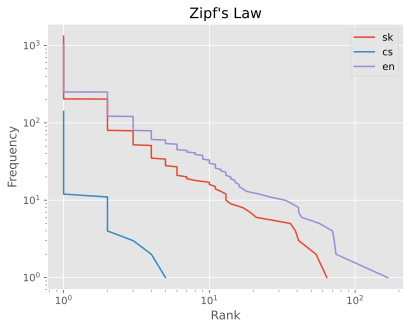

In [21]:
# Visualizing the data using zipf's law

do_law_of_zipf(data_raw)

# From the below graph, we can see a linear relationship between the log of rank and log of frequency for the languages sk and en... but not for cs

<a id='task2'></a>
# Task 2: Data Cleaning and Preprocessing

In [23]:
# We will be using some of this in the below function while preprocessing the data

print(string.punctuation)
print(string.digits)
print(string.ascii_lowercase)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
0123456789
abcdefghijklmnopqrstuvwxyz


In [24]:
str.translate?

Signature: str.translate(self, table, /)
Docstring:
Replace each character in the string using the given translation table.

  table
    Translation table, which must be a mapping of Unicode ordinals to
    Unicode ordinals, strings, or None.

The table must implement lookup/indexing via __getitem__, for instance a
dictionary or list.  If this operation raises LookupError, the character is
left untouched.  Characters mapped to None are deleted.
Type:      method_descriptor


In [25]:
def preprocess(text):
    '''
    Removes punctuation and digits from a string, and converts all characters to lowercase. 
    Also clears all \n and hyphens (splits hyphenated words into two words).
    
    '''
        
    preprocessed_text = text
    
    # We will make all text lowecase and remove hyphens
    preprocessed_text = preprocessed_text.lower().replace('-', ' ')
    
    # We will then create a translation table using the maketrans method
    translation_table = str.maketrans('\n', ' ', string.punctuation + string.digits)
    # the maketrans method takes 3 arguments:
    # 1. the characters to be replaced
    # 2. the characters to replace with
    # 3. the characters to be deleted (replaced with None)
    preprocessed_text = preprocessed_text.translate(translation_table)
        
    return preprocessed_text

In [26]:
# Now we will iterate over the data and preprocess it

data_preprocessed = {k: [preprocess(sentence) for sentence in v] for k,v in data_raw.items()}
# k is the language(key) and v is the list of sentences(value)

In [29]:
# Preprocessed data of the Czech language

data_preprocessed['cs']

['upozorňujeme že jejím cílem je šetřit penězi za administrativní výdaje ',
 'zcela otevřeně přiznám že ne vždy rozumím extrémně složitým vědeckým analýzám které dostávám ',
 'při práci na této zprávě bylo třeba abych pracovala právě s touto představivostí ',
 'a nakonec plně podporuji myšlenku sjednotit vědeckovýzkumný sektor v energetické oblasti jakožto klíčový prvek dané dlouhodobé politiky ',
 'to je vážná věc ',
 'z tohoto hlediska zcela souhlasím s připomínkami pana verheugena ',
 'rozprava je ukončena ',
 'vzhledem k významu které má stavebnictví pro evropské hospodářství je nutné odstranit technické překážky bránící obchodu se stavebními výrobky v zájmu zlepšení jejich volného pohybu na vnitřním trhu ',
 'v roce  je to popáté kdy byly z tohoto fondu uvolněny prostředky přičemž byla využita celková částka  milionů eur z plánované výše  milionů eur ',
 've svém vystoupení bych chtěla ocenit návrhy paní zpravodajky anny záborské které doporučují uznat vedle tradiční oficiální výd

In [30]:
# Now we will see the statistics of the preprocessed data

show_statistics(data_preprocessed)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 1996
Number of unique words	:	 1207
Sample extract		:	 pán de grandes pascual jasne vysvetlil aká...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 155
Number of unique words	:	 133
Sample extract		:	 upozorňujeme že jejím cílem je šetřit penězi...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 2366
Number of unique words	:	 904
Sample extract		:	 i can understand your approach a little...



If we compare the data before and after preprocessing, we can see that the number of words and unique words have decreased. This is because we have removed the stop words from the data.

Language: cs
| Old                    |     |   | New                    |     |
|------------------------|-----|---|------------------------|-----|
| Number of Sentences    | 10  |   | Number of Sentences    | 10  |
| Number of Words        | 158 |   | Number of Words        | 155 |
| Number of Unique Words | 141 |   | Number of Unique Words | 133 |

Language: sk
| Old                    |      |   | New                    |      |
|------------------------|------|---|------------------------|------|
| Number of Sentences    | 100  |   | Number of Sentences    | 100  |
| Number of Words        | 2016 |   | Number of Words        | 1996 |
| Number of Unique Words | 1322 |   | Number of Unique Words | 1207 |

Language: en
| Old                    |      |   | New                    |      |
|------------------------|------|---|------------------------|------|
| Number of Sentences    | 100  |   | Number of Sentences    | 100  |
| Number of Words        | 2381 |   | Number of Words        | 2366 |
| Number of Unique Words | 1037 |   | Number of Unique Words | 904  |

<a id='task3'></a>
# Task 3: The Naive Bayes Model

**Bayes' Theorem**

\begin{equation}
P(A | B)=\frac{P(B | A) \times P(A)}{P(B)}
\end{equation}

Now, let's translate this theory into our specific problem. In our case, where we want to categorise a sentence `my name is Ari` into one of `sk`, `cs`, or `en`, the following are the probabilities we want to determine.

\begin{equation}
P(\text {sk} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {sk}) \times P(\text {sk})}{P(\text {my name is Ari})}
\end{equation}

\begin{equation}
P(\text {cs} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {cs}) \times P(\text {cs})}{P(\text {my name is Ari})}
\end{equation}

\begin{equation}
P(\text {en} | \text {my name is Ari})=\frac{P(\text {my name is Ari} | \text {en}) \times P(\text {en})}{P(\text {my name is Ari})}
\end{equation}

## Unseen Data

Since we assume conditional independence across our features, our numerator term for any of the above equations can be broken into the following.

\begin{equation}
P(\text {my name is Ari} | \text {en}) = P(\text {my} | \text {en}) \times P(\text {name} | \text {en}) \times P(\text {is} | \text {en}) \times P(\text {Ari} | \text {en})
\end{equation}

## Vectorizing Training Data

| Sentence       | my | is | I | love | name | it | Ari |
|----------------|----|----|---|------|------|----|-----|
| my name is Ari | 1  | 1  | 0 | 0    | 1    | 0  | 1   |
| I love it      | 0  | 0  | 1 | 1    | 0    | 1  | 0   |

In [31]:
sentences_train, y_train = [], []
# here y_train is the list of labels

for k,v in data_preprocessed.items():
    for sentence in v:
        sentences_train.append(sentence)
        y_train.append(k)  # y value is the output we want our model to learn(predict)

In [32]:
vectorizer = CountVectorizer()
# we want vectorizer to learn how to "vectorize" the dataset

In [37]:
X_train = vectorizer.fit_transform(sentences_train)

X_train

<210x2208 sparse matrix of type '<class 'numpy.int64'>'
	with 3867 stored elements in Compressed Sparse Row format>

In [38]:
# Sparse Matrix
print(X_train)
print("\nShape is",X_train.shape)

  (0, 1404)	1
  (0, 304)	1
  (0, 536)	1
  (0, 1130)	1
  (0, 669)	1
  (0, 1947)	1
  (0, 52)	1
  (0, 673)	1
  (0, 1307)	1
  (0, 571)	1
  (0, 312)	1
  (0, 1749)	1
  (0, 1931)	1
  (0, 2196)	2
  (0, 311)	1
  (0, 752)	1
  (0, 1590)	1
  (0, 1238)	1
  (0, 1282)	1
  (0, 148)	1
  (0, 390)	1
  (0, 55)	1
  (0, 47)	1
  (0, 1829)	1
  (0, 1816)	1
  :	:
  (208, 1763)	1
  (209, 1780)	1
  (209, 349)	1
  (209, 1058)	1
  (209, 1123)	1
  (209, 1759)	2
  (209, 497)	2
  (209, 76)	2
  (209, 614)	1
  (209, 552)	1
  (209, 1064)	1
  (209, 1758)	1
  (209, 2033)	2
  (209, 661)	3
  (209, 2024)	2
  (209, 68)	1
  (209, 62)	1
  (209, 997)	1
  (209, 1539)	1
  (209, 691)	1
  (209, 520)	1
  (209, 367)	1
  (209, 537)	1
  (209, 240)	1
  (209, 91)	1

Shape is (210, 2208)


## Initializing Model Parameters and Training

In [39]:
naive_classifier = MultinomialNB()
naive_classifier.fit(X_train, y_train)

# here we get 3 values:
# 1. alpha: the smoothing parameter (hyperparameter)
# 2. class_prior: the prior probabilities of the classes
# 3. fit_prior: whether to learn the prior probabilities or not

MultinomialNB()

## Vectorizing Validation Data and Evaluating Model

In [40]:
data_val = dict()

data_val['sk'] = open_file('Data/Sentences/val_sentences.sk')
data_val['cs'] = open_file('Data/Sentences/val_sentences.cs')
data_val['en'] = open_file('Data/Sentences/val_sentences.en')

# performing preprocessing on the validation data
data_val_preprocessed = {k: [preprocess(sentence) for sentence in v] for k,v in data_val.items()}

In [41]:
sentences_val, y_val = [], []

for k,v in data_val_preprocessed.items():
    for sentence in v:
        sentences_val.append(sentence)
        y_val.append(k)

In [42]:
# Now we will use vectorizer to vectorize the validation data but we don't fit it again

X_val = vectorizer.transform(sentences_val)

In [43]:
predictions = naive_classifier.predict(X_val)

In [44]:
predictions

# contains a matrix of predictions

array(['sk', 'sk', 'sk', ..., 'en', 'en', 'en'], dtype='<U2')

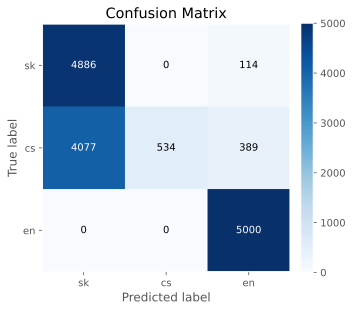

In [46]:
# Now we will visualize the predictions using confusion matrix

plot_confusion_matrix(y_val, predictions,['sk', 'cs', 'en'],)

Over here we see and notice the following:
- Model is predicting correcting for the English and Slovak sentences.
- Model is not predicting correctly for the Czech sentences.
- This is because we have a class imbalance problem. This means that we have more English and Slovak sample data more than the Czech data. This can be a problem because the model will be biased towards English and Slovak data and will not be able to predict Czech data correctly.

In [48]:
# Now we will calculate the accuracy of the model using f1 score
# f1 score is the harmonic mean of precision and recall

f1_score(y_val, predictions, average='weighted')

# 61.5% accuracy is what we get... this is not good enough and can be improved

0.6149824401040264

<a id='task4'></a>
# Task 4: Simple Adjustments and Highlighting Model Shortcomings

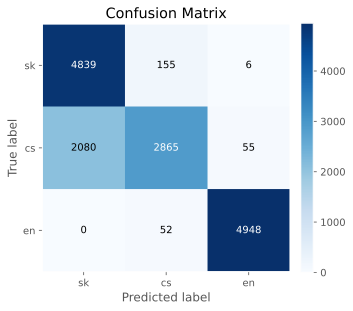

In [50]:
naive_classifier = MultinomialNB(alpha=0.0001, fit_prior=False)
# fit_prior=False means that we are not learning the prior probabilities(each language has an equal probability of occuring)
naive_classifier.fit(X_train, y_train)

predictions = naive_classifier.predict(X_val)

plot_confusion_matrix(y_val, predictions,['sk', 'cs', 'en'],)

# Here we find that the values are more better predicted than before

In [51]:
f1_score(y_val, predictions, average='weighted')
# accuracy has been increased to 83.7%

0.8368507601649364

<a id='task5'></a>
# Task 5: Using Subwords to Shift Perspective

**Dummy Dataset**

playing ; eating ; play ; reads ; tea

**Step 1**

Break each word into characters

playing > p l a y i n g


**Step 2**

Find common character sequences

ea, ing, play

**Step 3**

Convert dataset using these subwords into

play ing ; ea t ing ; play ; r ea d s ; t ea

In [52]:
# taken from https://arxiv.org/abs/1508.07909
# this is the original introduction to using subwords in NLP tasks

import re, collections
def get_stats(vocab):
    pairs = collections.defaultdict(int) 
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq 
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word] 
    return v_out

In [53]:
def get_vocab(data):

    words = []
    for sentence in data:
        words.extend(sentence.split())
        
    vocab = defaultdict(int)
    for word in words:
        vocab[' '.join(word)] += 1
        
    return vocab

In [54]:
vocab = get_vocab(sentences_train)

In [55]:
# also taken from original paper
for i in range(100):
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get) 
    vocab = merge_vocab(best, vocab)

# it will do the merges and iteratively improve the vocabulary

In [56]:
merges = defaultdict(int)
for k, v in vocab.items():
    for subword in k.split():
        if len(subword) >= 2:
            merges[subword] += v

In [57]:
merge_ordered = sorted(merges, key=merges.get, reverse=True)

# Sorts by the values

In [58]:
merge_ordered

['re',
 'st',
 'in',
 'the',
 'to',
 'an',
 'en',
 'po',
 'al',
 'is',
 'er',
 'it',
 'ro',
 'ed',
 'ov',
 'ne',
 'ch',
 'ie',
 'ia',
 'pr',
 'om',
 'ar',
 'ou',
 'on',
 'le',
 'pre',
 'na',
 'ce',
 've',
 'je',
 'me',
 'and',
 'of',
 'as',
 'de',
 'at',
 'li',
 'ho',
 'pro',
 'sk',
 'ing',
 'or',
 'th',
 'la',
 'ion',
 'for',
 'by',
 'ci',
 'do',
 'ur',
 'se',
 'že',
 'il',
 'ra',
 'sa',
 'te',
 'vo',
 'no',
 'ent',
 'ic',
 'ak',
 'mo',
 'be',
 'lo',
 'áv',
 'pe',
 'ct',
 'ment',
 'né',
 'so',
 'that',
 'vy',
 'si',
 'mi',
 'ly',
 'ation',
 'we',
 'ých',
 'mu',
 'wh',
 'bu',
 'ke',
 'im',
 'ktor',
 'sti',
 'ul',
 'ate',
 'av',
 'con',
 'ad',
 'bo',
 'aj',
 'not',
 'ss',
 'port',
 'ri',
 'vý',
 'ať',
 'por',
 'kto']

In [59]:
pkl.dump(merge_ordered, open('Data/Auxiliary/merge_ordered.pkl', 'wb'))

In [60]:
def split_into_subwords(text):
    merges = pkl.load(open('Data/Auxiliary/merge_ordered.pkl', 'rb'))
    subwords = []
    for word in text.split():
        for subword in merges:
            subword_count = word.count(subword)
            if subword_count > 0:
                word = word.replace(subword, ' ')
                subwords.extend([subword]*subword_count)
    return ' '.join(subwords)

In [61]:
# If we take a sample sentence and split it into subwords

split_into_subwords("This is a sample sentence")

'is is le sa en en ce'

In [62]:
data_preprocessed_subwords = {k: [split_into_subwords(sentence) for sentence in v] for k,v in data_preprocessed.items()}

In [63]:
show_statistics(data_preprocessed_subwords)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 3431
Number of unique words	:	 75
Sample extract		:	 de an de al as ne as...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 239
Number of unique words	:	 59
Sample extract		:	 po je me or že je le...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 3863
Number of unique words	:	 75
Sample extract		:	 an st an er ou ro ch...



In [64]:
data_train_subwords = []
for sentence in sentences_train:
    data_train_subwords.append(split_into_subwords(sentence))

In [65]:
data_val_subwords = []
for sentence in sentences_val:
    data_val_subwords.append(split_into_subwords(sentence))

In [66]:
vectorizer = CountVectorizer()

In [67]:
X_train = vectorizer.fit_transform(data_train_subwords)
X_val = vectorizer.transform(data_val_subwords)

In [68]:
naive_classifier = MultinomialNB(alpha=1, fit_prior=False)
naive_classifier.fit(X_train, y_train)

predictions = naive_classifier.predict(X_val)

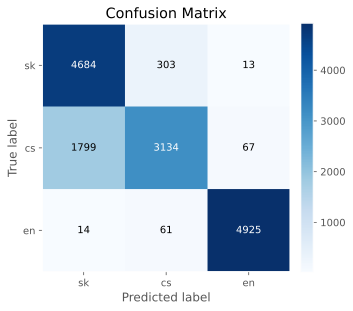

In [69]:
plot_confusion_matrix(y_val, predictions,['sk', 'cs', 'en'])

In [70]:
f1_score(y_val, predictions, average='weighted')

# This is an improvement over the previous model

0.8456381060126386

In [71]:
# Now we will save the model which we used

joblib.dump(naive_classifier, 'Data/Models/final_model.joblib')
joblib.dump(vectorizer, 'Data/Vectorizers/final_model.joblib')

['Data/Vectorizers/final_model.joblib']